## Data Mining Application for Predicting Diabetes

### Barbul Athina-Oana, Student First Year MSE UPT

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Dataset

The dataset used in this project is procured from https://www.kaggle.com/uciml/pima-indians-diabetes-database

##### Read the data

In [2]:
df = pd.read_csv('diabetes.csv',delimiter = ',')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

##### Verify if there are null values in the data set

In [5]:
df.isnull().sum()
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Dataset statistics

In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

##### Encode categorical data

1 -> Diabetes | 0 -> Non-diabetes

Text(0.5, 1.0, 'Diabetes Outcome')

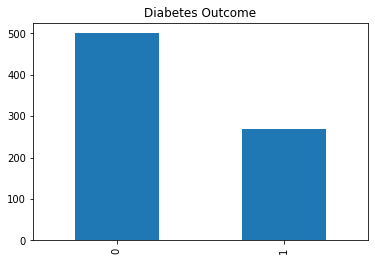

In [7]:
df['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

### Data visualisation

We use the mutual information classifier from Sklearn to measures the dependency between the features and to see which one informs us the best about the Outcome:

In [8]:
from sklearn.feature_selection import mutual_info_classif

In [9]:
mi = mutual_info_classif(df.drop('Outcome', axis = 1), df['Outcome'])

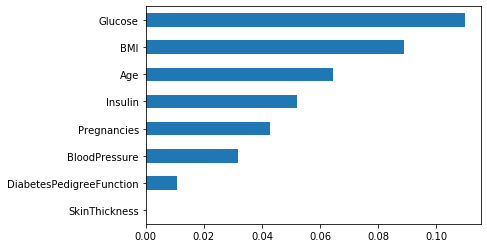

In [10]:
mi = pd.Series(mi)
mi.index = df.columns[0:8]
mi.sort_values(ascending=True, inplace=True)
mi.plot.barh()

We proceed to visualize the relationship between the feature variables with the dependent variable (last column called 'Outcome' that is the diagnosis), where also little linear dependency can be noted between the variables.

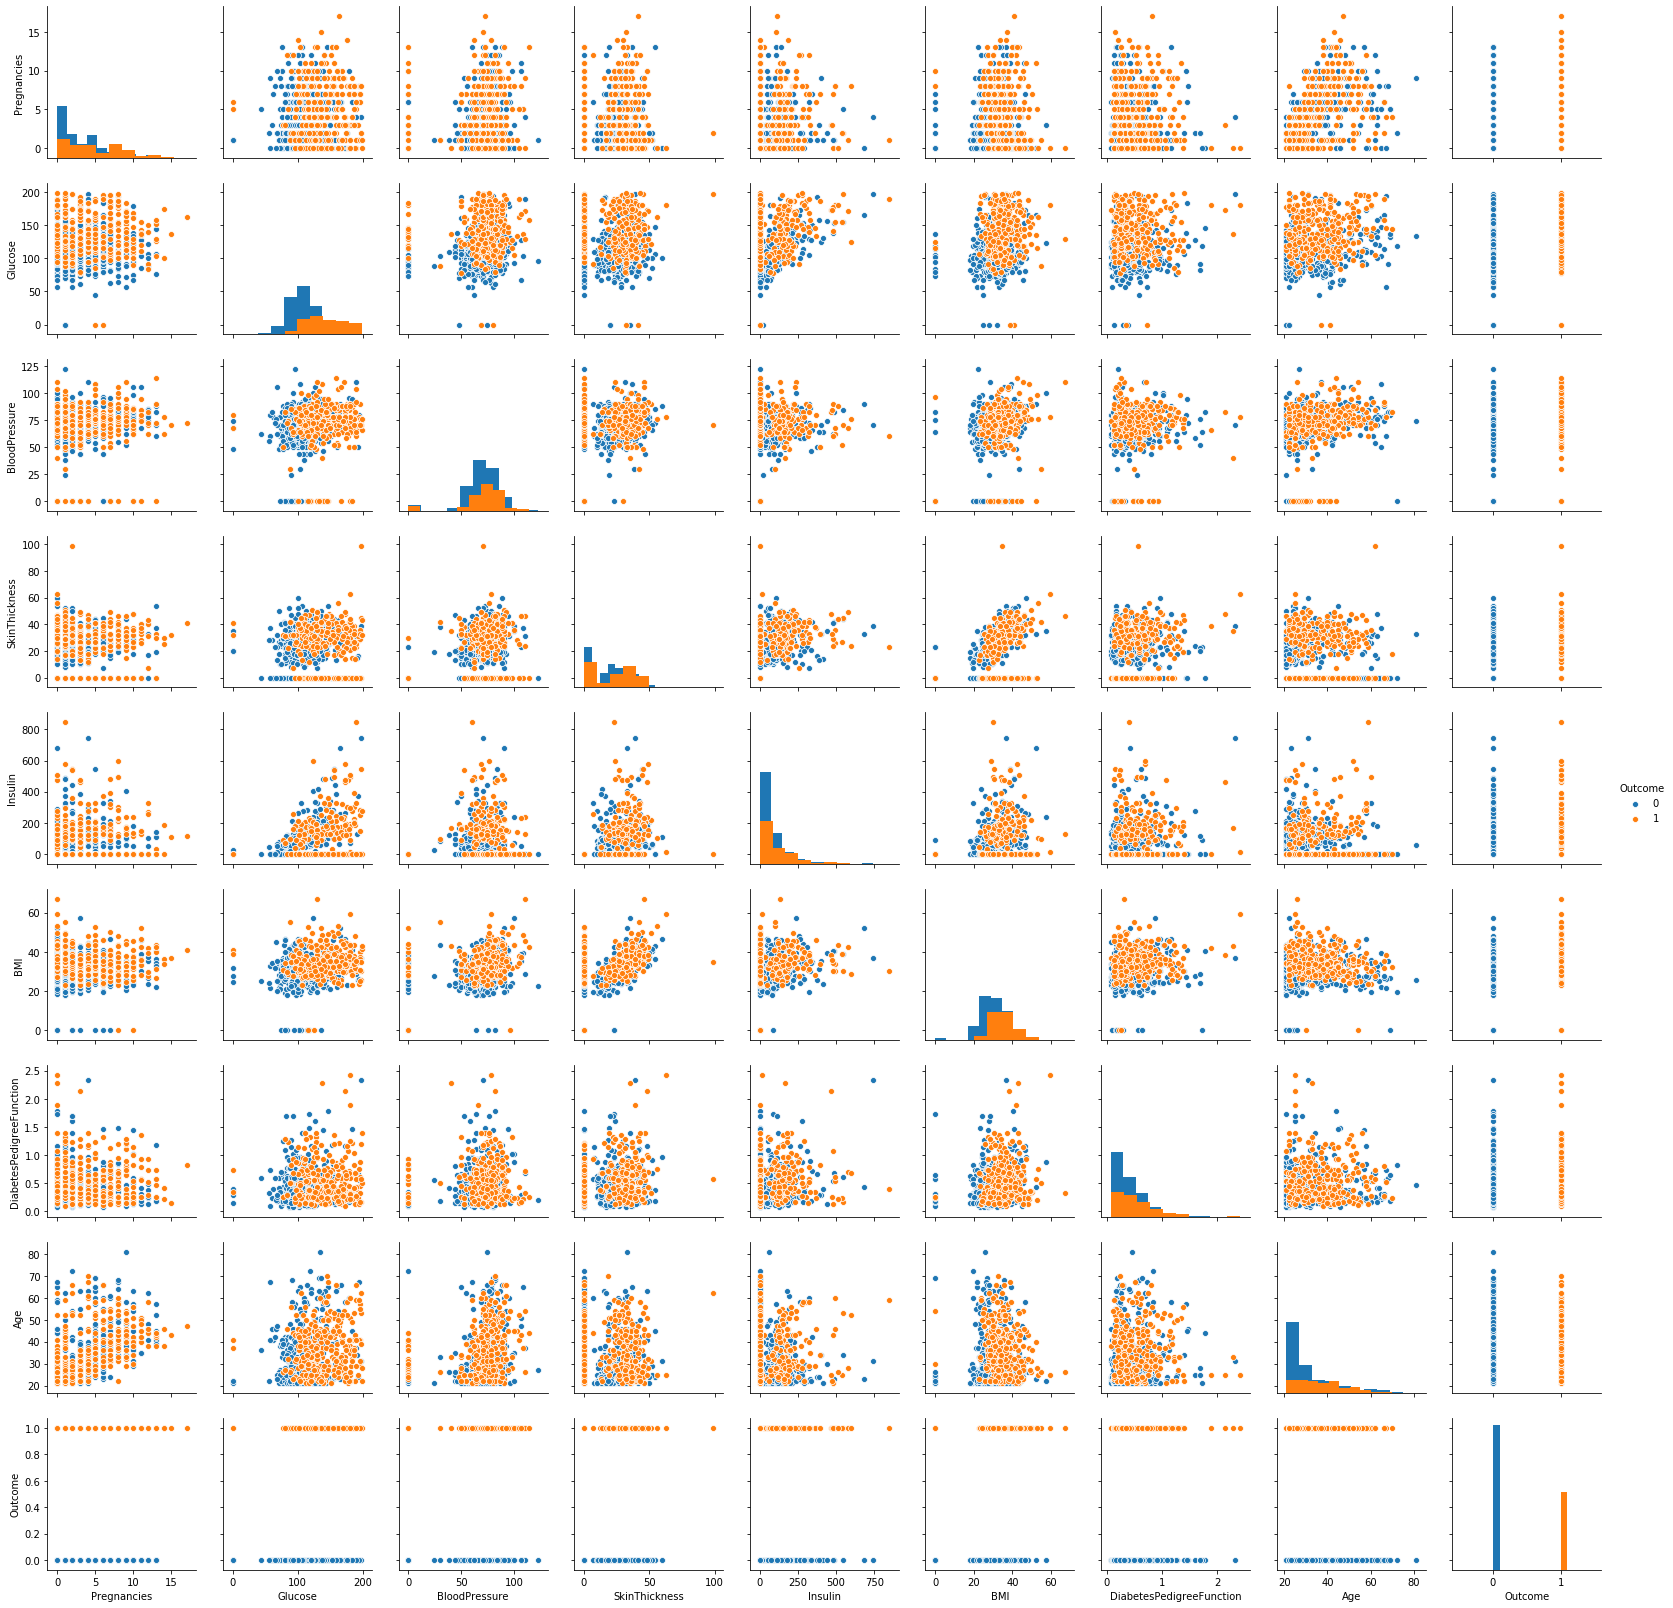

In [11]:
sns.pairplot(df, hue = 'Outcome', diag_kind = 'hist')

We are going to separate the features into a list.

In [12]:
features_mean= list(df.columns[0:8])

To quantify possible dependencies between the feature variables we will use Seaborn to create a heatmap of the correlations between the features:

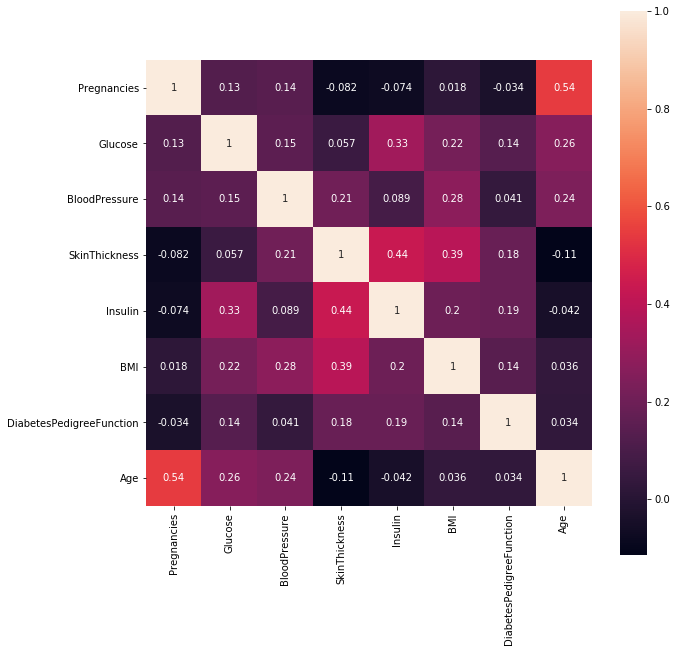

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True)
plt.show()

We visualize boxplots to get a better idea of the influence of each variable on the Outcome.

We can also see how the glucose levels or blood pressure can have (or not) different values for the features plotting the distribution of each type of diagnosis for each of the mean features.

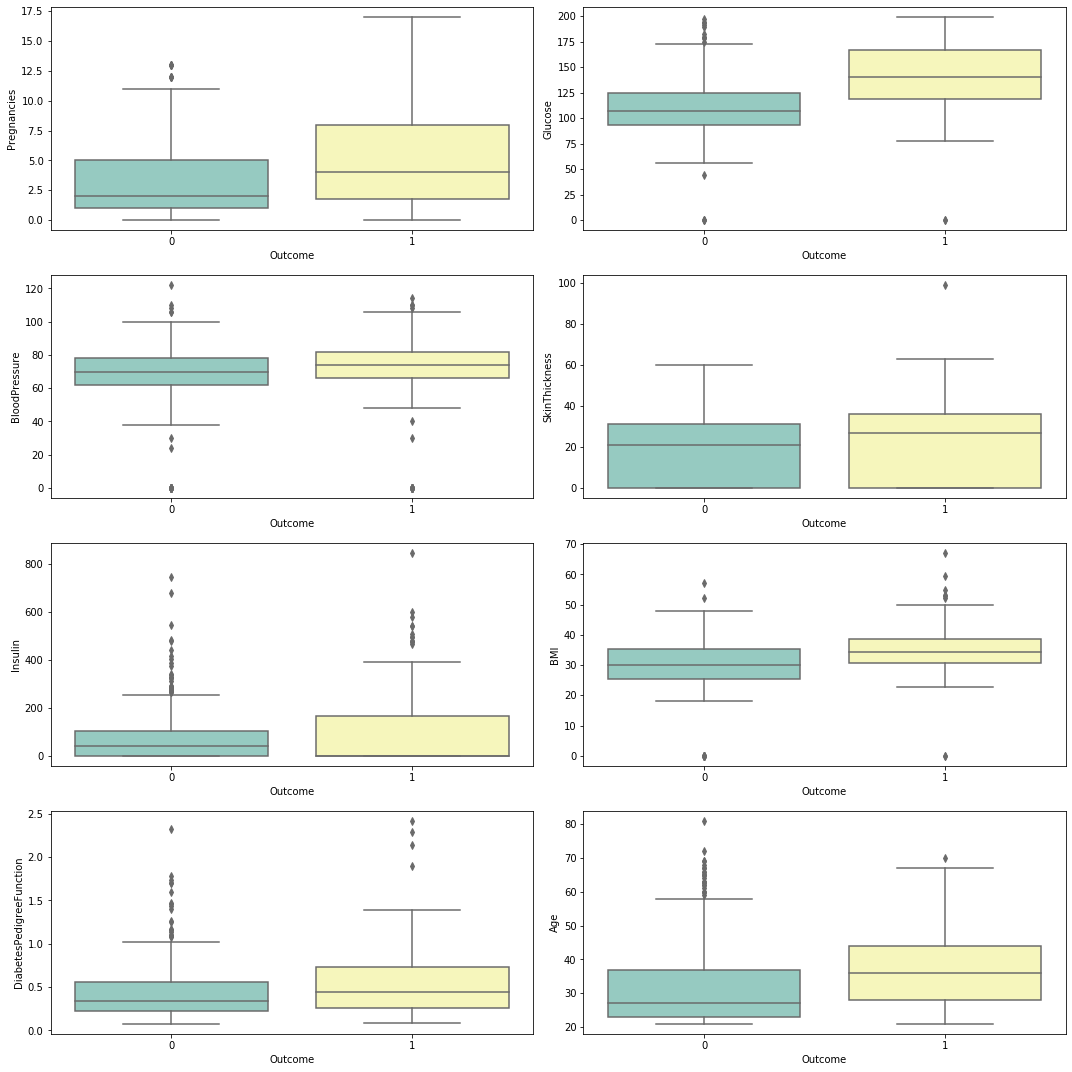

In [14]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='Outcome', y=feature, data=df, palette="Set3")

plt.tight_layout()
plt.show()

##### Conclusions from data visualisation

- The mutual information functions showed us that the most important feature from the set is Glucose, followed by the BMI level. Also in the boxplots, we can see that the Glucose influences the Outcome.

- From the scatter plots we cand see that there is a relevant number of outliers for BloodPressure, SkinThickness and DiabetesPedigreeFunction. Also, the scatter plots doesn't inform us a lot about the relationship between the features.

- The heatmap shows us that the corellations are low, except for the Pregnancies and Insulin-SkinThickness.

### Preprocessing

In [15]:
from scipy import stats

We have seen that the data set doesn't contain null values, but there are some features that have zero values. We are going to replace the zero values with the mean value for each important feature.

In [16]:
df.eq(0).any().any()

True

In [17]:
df == 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,True
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [18]:
df.Glucose.replace(0, df['Glucose'].median(), inplace=True)
df.BloodPressure.replace(0, df['BloodPressure'].median(), inplace=True)
df.BMI.replace(0, df['BMI'].median(), inplace=True)
df.Age.replace(0, df['Age'].median(), inplace=True)

 Also, we are going to remove all rows that have outliers in at least one column by computing at first for each column the Z-score of each value in the column, relative to the column mean and standard deviation.  Then we take the absolute Z-score only if it is below the threshold.

In [19]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


### Data mining models construction

We are going to divide the data set into a training set and a test set, in a stratified fashion, using the Outcome as the label. The proportion between the train set and the test set should be 70% and 30%.

In [21]:
import sklearn.model_selection as ms

In [22]:
X = df[['Glucose', 'BloodPressure', 'Age','BMI', 'Insulin']]  # Features
y = df['Outcome']  # Labels

In [23]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3) 

In [24]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (504, 5)
Training Labels Shape: (504,)
Testing Features Shape: (217, 5)
Testing Labels Shape: (217,)


We are going to use the Random Forest Classifier as the first model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(n_estimators=100)

The second model would be the LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lrm = LogisticRegression()

We train the models with the training sets and predict on the test set

In [27]:
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

In [36]:
lrm.fit(X_train,y_train)

predictions_lrm = lrm.predict(X_test)

C:\Users\barbua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Evaluation

To evaluate our models we are going to use metrics from the scikit-learn module

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

The accuracy metric shows us how often is the classifier correct

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7695852534562212


In [37]:
print("Accuracy:",metrics.accuracy_score(predictions_lrm, predictions))

Accuracy: 0.8294930875576036


Text(0.5, 15.0, 'Predicted label')

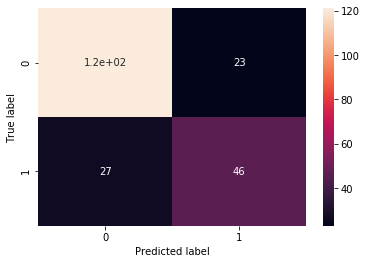

In [31]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

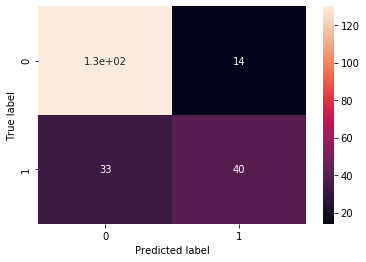

In [38]:
sns.heatmap(confusion_matrix(y_test, predictions_lrm), annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')